In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from scipy.stats import chi2_contingency, spearmanr, skew, pearsonr, zscore
from sklearn.utils import Bunch
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import r2_score, roc_curve, auc, confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

#Random Forest
from sklearn.ensemble import RandomForestClassifier
#XGBOOST
import xgboost as xgb
from xgboost import XGBClassifier

In [125]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Credit Score Classification/Credit_score_cleaned_data.csv')
data

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Last_Loan_9,Last_Loan_8,Last_Loan_7,Last_Loan_6,Last_Loan_5,Last_Loan_4,Last_Loan_3,Last_Loan_2,Last_Loan_1,Credit_Score
0,CUS_0x98ed,31,Journalist,22229.060,1672.421667,6,4,5.0,3,10,10,9.44,9,Standard,1396.14,33.061861,156,Yes,52.138474,44.084010,High_spent_Medium_value_payments,321.019683,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Debt Consolidation Loan,Home Equity Loan,Debt Consolidation Loan,Standard
1,CUS_0x36b4,43,Musician,17060.705,1685.725417,8,3,11.0,4,24,8,9.64,2,Standard,268.81,36.377621,269,Yes,51.934634,39.628311,Low_spent_Small_value_payments,327.009597,No Loan,No Loan,No Loan,No Loan,No Loan,Debt Consolidation Loan,Home Equity Loan,Auto Loan,Auto Loan,Standard
2,CUS_0x105b,24,Accountant,34428.210,2575.017500,2,4,8.0,0,3,12,8.51,0,Good,180.70,39.917508,326,No,0.000000,84.774645,High_spent_Small_value_payments,432.727105,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Good
3,CUS_0x4c4a,21,Accountant,12613.920,1155.160000,4,6,13.0,3,14,17,17.51,3,Standard,569.11,39.841494,376,Yes,16.941903,41.943603,Low_spent_Medium_value_payments,346.630494,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Personal Loan,Student Loan,Home Equity Loan,Standard
4,CUS_0x612f,31,Journalist,34775.160,3048.930000,7,9,25.0,5,20,20,17.16,6,Bad,3003.45,36.058472,162,Yes,126.596814,67.970377,High_spent_Medium_value_payments,360.325808,No Loan,No Loan,No Loan,No Loan,Auto Loan,Mortgage Loan,Auto Loan,Payday Loan,Not Specified,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0xc52a,46,Writer,35032.660,2853.388333,10,6,33.0,7,48,18,6.52,10,Bad,1789.00,25.463506,135,Yes,150.500097,106.840174,High_spent_Small_value_payments,287.998562,No Loan,No Loan,Credit-Builder Loan,Student Loan,Personal Loan,Mortgage Loan,Payday Loan,Payday Loan,Student Loan,Poor
99996,CUS_0x83cc,34,Engineer,125047.240,10682.603333,2,5,9.0,0,11,4,7.83,0,Good,1223.02,33.415357,325,No,0.000000,228.184209,High_spent_Large_value_payments,1080.076124,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Standard
99997,CUS_0x6ae6,26,Lawyer,9045.485,644.664842,8,7,20.0,6,52,16,19.16,11,Bad,2271.24,36.752789,224,Yes,63.795418,24.218367,Low_spent_Small_value_payments,285.190831,No Loan,No Loan,No Loan,Not Specified,Student Loan,Auto Loan,Not Specified,Student Loan,Auto Loan,Poor
99998,CUS_0x6f0c,20,Lawyer,53564.880,4207.740000,5,3,13.0,2,6,7,19.98,2,Standard,1008.31,28.206586,190,Yes,80.569833,215.490636,High_spent_Small_value_payments,384.713531,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Mortgage Loan,Personal Loan,Standard


# **GIẢI THÍCH DỮ LIỆU**

**ID:** Mã định danh duy nhất cho mỗi bản ghi trong bộ dữ liệu.

**Customer_ID:** Mã định danh duy nhất cho từng khách hàng.

**Month:** Tháng ghi nhận dữ liệu liên quan đến khách hàng

**Name:** Tên của khách hàng.

**Age:** Tuổi của khách hàng.

**SSN (Social Security Number):** Số an sinh xã hội, một mã duy nhất được cấp cho mỗi công dân (chủ yếu ở Hoa Kỳ) nhằm theo dõi các quyền lợi và thuế.

**Occupation:** Nghề nghiệp của khách hàng.

**Annual_Income:** Thu nhập hàng năm của khách hàng.

**Monthly_Inhand_Salary:** Mức lương hàng tháng mà khách hàng nhận được sau khi đã trừ các khoản thuế và chi phí.

**Num_Bank_Accounts:** Số lượng tài khoản ngân hàng mà khách hàng hiện có.

**Num_Credit_Card:** Số lượng thẻ tín dụng mà khách hàng sở hữu.

**Interest_Rate:** Lãi suất áp dụng cho khách hàng liên quan đến các khoản vay hoặc thẻ tín dụng.

**Num_of_Loan:** Số lượng khoản vay mà khách hàng đang có.

**Type_of_Loan:** Loại hình vay mà khách hàng đang tham gia (ví dụ: vay mua nhà, vay xe hơi, vay tiêu dùng).

**Delay_from_due_date:** Số ngày khách hàng trễ hạn thanh toán so với ngày đến hạn.

**Num_of_Delayed_Payment:** Số lần khách hàng đã thanh toán chậm so với kỳ hạn thanh toán.

**Changed_Credit_Limit:** Thay đổi trong giới hạn tín dụng của khách hàng (nếu có), thể hiện mức thay đổi tín dụng được cấp.

**Num_Credit_Inquiries:** Số lần khách hàng đã yêu cầu kiểm tra tín dụng (thường liên quan đến việc xin vay hoặc mở thẻ tín dụng).

**Credit_Mix:** Sự kết hợp giữa các loại sản phẩm tín dụng mà khách hàng có, chẳng hạn như thẻ tín dụng, khoản vay cá nhân, khoản vay thế chấp...

**Outstanding_Debt:** Số dư nợ còn lại mà khách hàng chưa thanh toán.

**Credit_Utilization_Ratio:** Tỷ lệ sử dụng tín dụng, cho biết phần trăm tín dụng khách hàng đang sử dụng so với giới hạn tín dụng được cấp.

**Credit_History_Age:** Độ tuổi của lịch sử tín dụng của khách hàng, tức là thời gian khách hàng đã sử dụng tín dụng.

**Payment_of_Min_Amount:** Thông tin về việc khách hàng có thanh toán tối thiểu của hóa đơn tín dụng hay không (có hoặc không).

**Total_EMI_per_month:** Tổng số tiền phải thanh toán hàng tháng cho các khoản vay (EMI: Equated Monthly Installment).

**Amount_invested_monthly:** Số tiền mà khách hàng đầu tư hàng tháng (có thể liên quan đến các khoản tiết kiệm hoặc đầu tư).

**Payment_Behaviour:** Hành vi thanh toán của khách hàng, thể hiện mức độ đều đặn và chính xác của các khoản thanh toán (có thể là định tính hoặc định lượng).

**Monthly_Balance:** Số dư tài chính hàng tháng của khách hàng sau khi đã trừ đi các chi phí và khoản thanh toán.

**Credit_Score:** Điểm tín dụng của khách hàng, một chỉ số quan trọng để đánh giá khả năng tín dụng và rủi ro tài chính.

# **CHECKING**

In [126]:
category_cols = ['Occupation', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_Credit_Inquiries',
                 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Last_Loan_9', 'Last_Loan_8', 'Last_Loan_7',
                 'Last_Loan_6', 'Last_Loan_5', 'Last_Loan_4', 'Last_Loan_3', 'Last_Loan_2', 'Last_Loan_1']

numeric_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Delay_from_due_date',
                'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

In [127]:
data[numeric_cols].describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.309240,50505.123449,4198.771859,14.53208,21.068780,13.329240,10.389098,1426.220376,32.285173,221.206880,88.209450,193.686347,403.492393
std,10.764996,38299.422093,3187.494345,8.74133,14.860104,6.269066,6.783550,1155.129026,5.116875,99.681112,83.244703,194.785222,214.423009
min,14.000000,7005.930000,303.645417,1.00000,-5.000000,0.000000,-6.490000,0.230000,20.000000,1.000000,-1.000000,0.000000,0.007760
25%,24.000000,19342.972500,1626.761667,7.00000,10.000000,9.000000,5.340000,566.072500,28.052567,144.000000,25.589532,73.730625,270.322511
50%,33.000000,36999.705000,3096.378333,13.00000,18.000000,14.000000,9.400000,1166.155000,32.305784,219.000000,61.541296,129.361839,337.270985
75%,42.000000,71683.470000,5961.745000,20.00000,28.000000,18.000000,14.850000,1945.962500,36.496663,302.000000,131.528154,234.346249,471.928804
max,56.000000,179987.280000,15204.633333,34.00000,67.000000,28.000000,36.970000,4998.070000,50.000000,404.000000,357.406068,1977.326102,1602.040519


***Như vậy, dữ liệu nhìn chung không có giá trị outliers, duy chỉ có "Total_EMI_per_month" không nên <0, nên ta sẽ bỏ đi***

In [128]:
data = data[data['Total_EMI_per_month']>=0]

In [129]:
df_good = data[data['Credit_Score']=='Good']
df_stand = data[data['Credit_Score']=='Standard']
df_poor = data[data['Credit_Score']=='Poor']

***EDA***

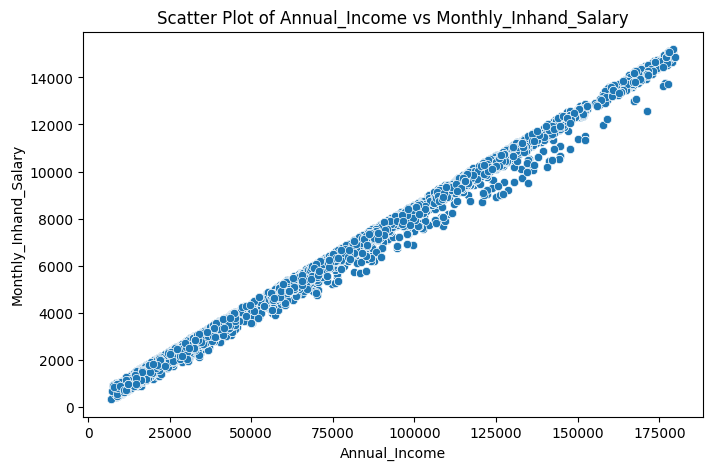

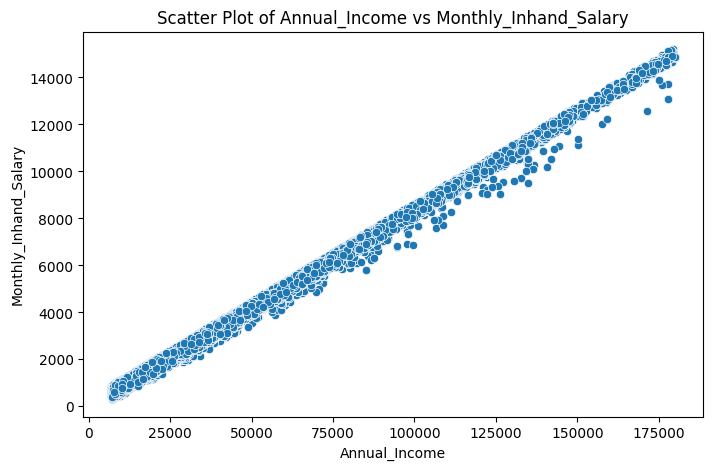

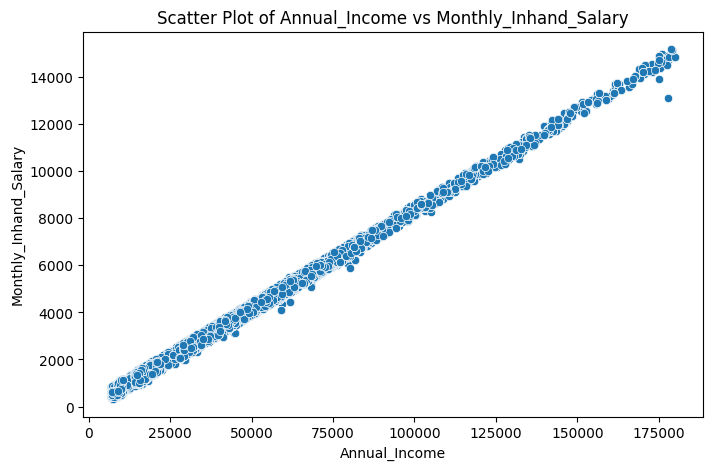

In [130]:
for data_frame in [df_good, df_stand, df_poor]:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='Annual_Income', y='Monthly_Inhand_Salary', data=data_frame)
    plt.title('Scatter Plot of Annual_Income vs Monthly_Inhand_Salary')
    plt.xlabel('Annual_Income')
    plt.ylabel('Monthly_Inhand_Salary')
    plt.show()

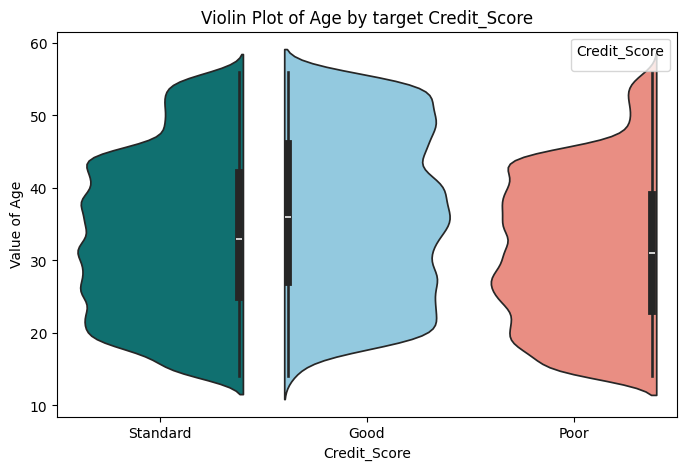

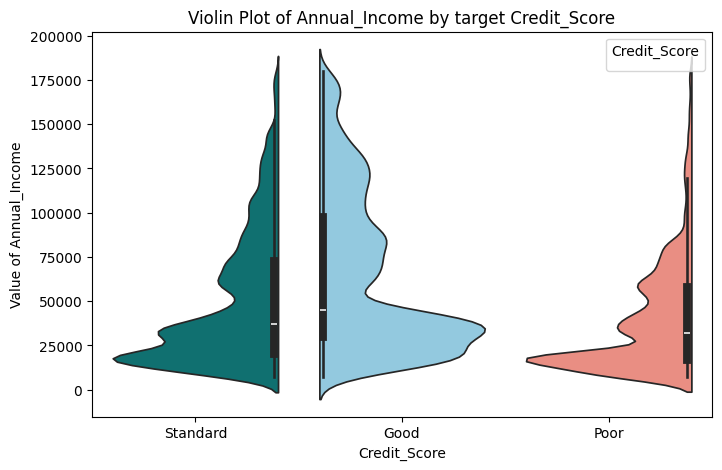

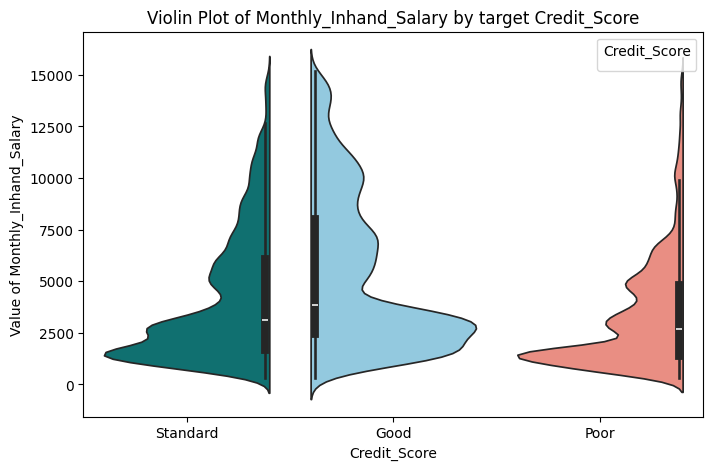

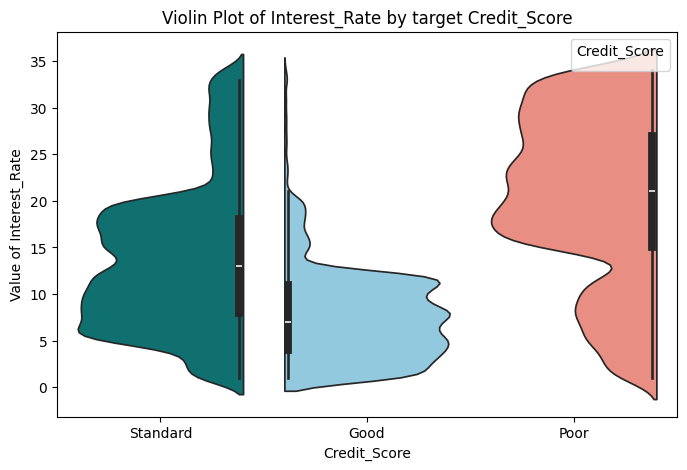

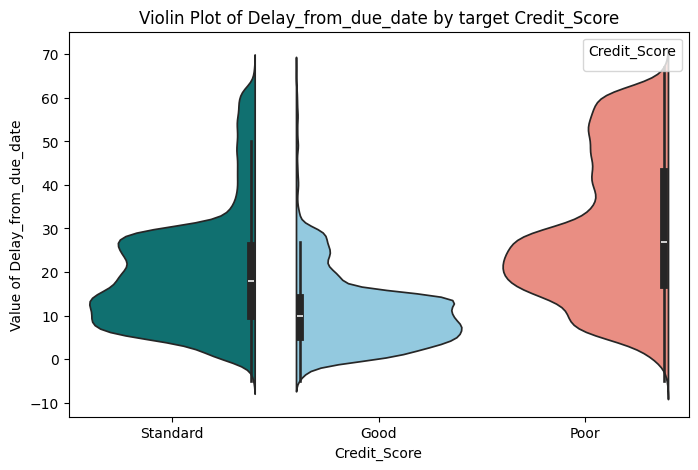

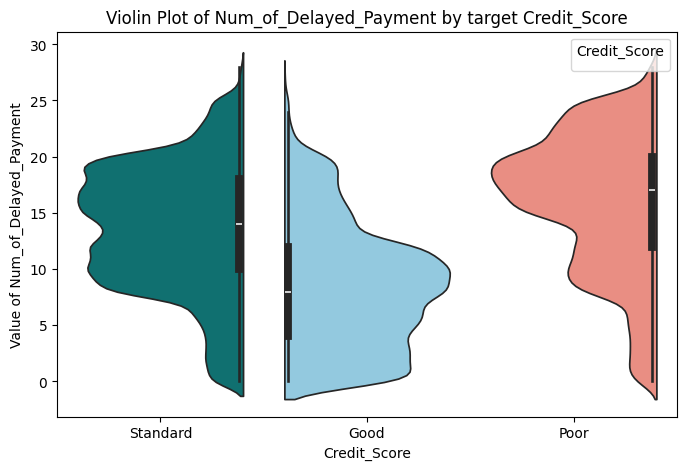

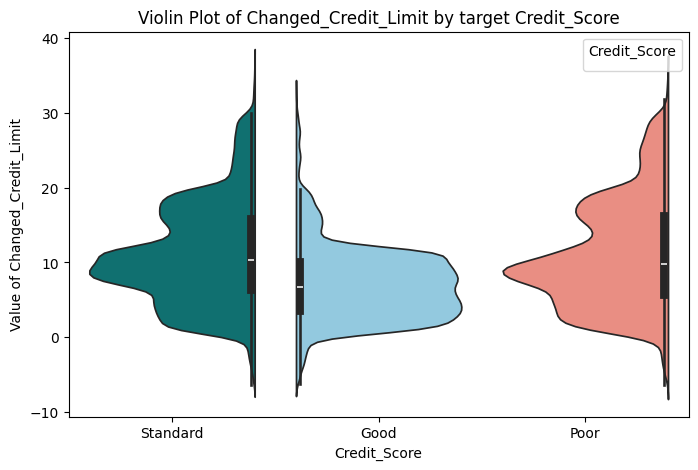

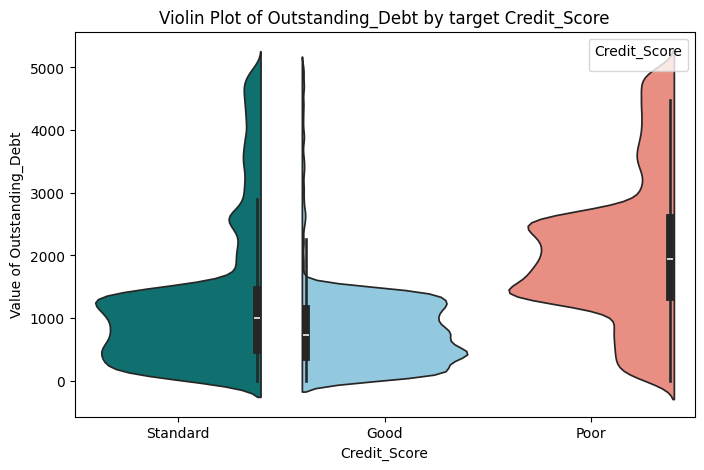

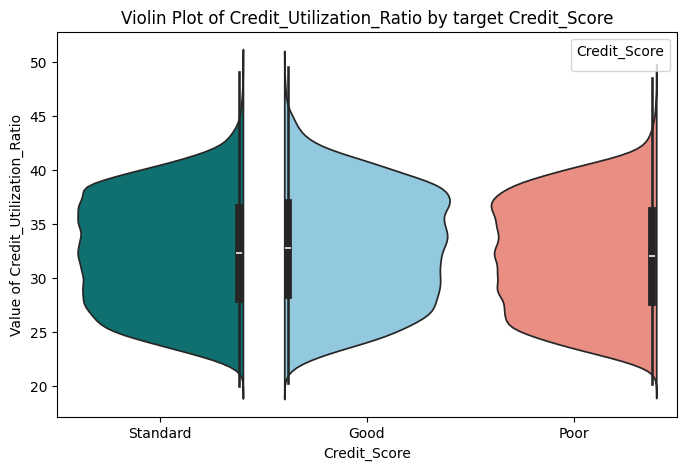

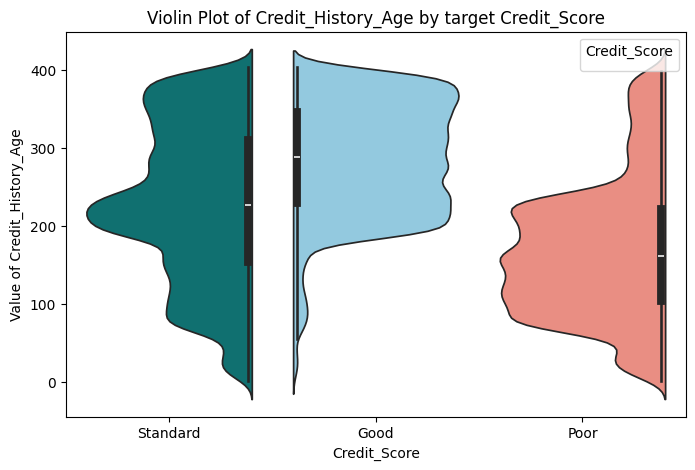

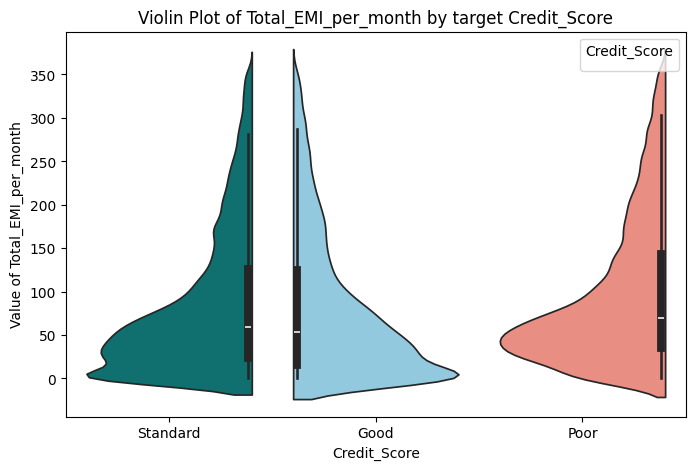

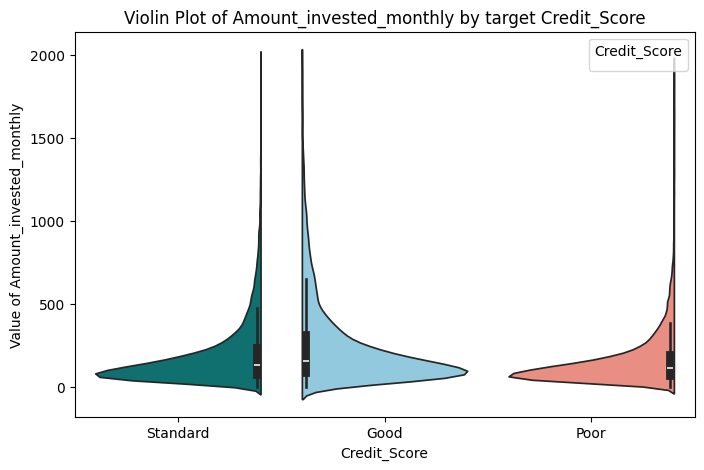

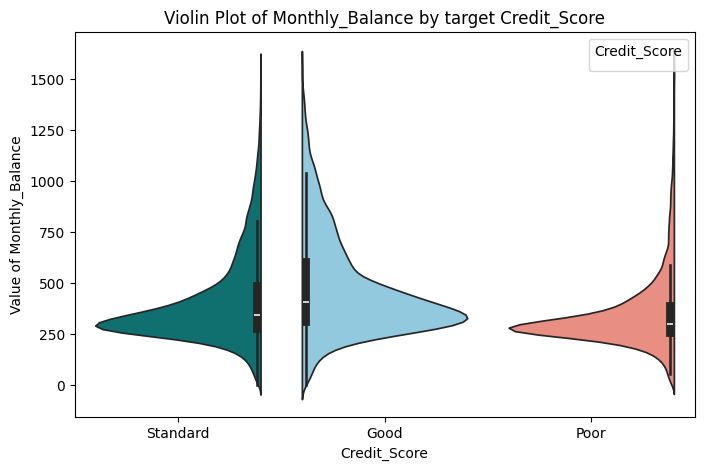

In [131]:
for i in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='Credit_Score', y=i, data=data, split=True, hue='Credit_Score', palette=['teal', 'skyblue', 'salmon'])
    plt.title(f'Violin Plot of {i} by target Credit_Score')
    plt.xlabel('Credit_Score')
    plt.ylabel(f'Value of {i}')
    plt.legend(title='Credit_Score', loc='upper right')
    plt.show()

***Nhận xét: Nhìn qua bản đồ, dễ thấy các columns có thể có ảnh hưởng mạnh mẽ bao gồm: Credit_History_Age, Outstanding_Debt, Num_Of_Delayed_Payment, Delay_from_Due_date, Interested_rate, Monthly_inhance_salary, Annual_income***

# **FUNCTION**

In [132]:
# Hàm đánh giá hiệu suất
def print_scores(y_test, y_pred):
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Hàm chia tập train-test và Standard Scaler
def preprocess_data(data, test_size=0.3, random_state=42):
    # Chia tập train-test
    X = data.drop(columns=['Credit_Score'], axis=1)
    y = data['Credit_Score']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Standard Scaler:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

# Hàm tính Cross Validation
def cross_val(model, X_train, y_train):
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print("Cross-validation scores:", cv_scores)
    print("Mean CV score:", cv_scores.mean())
    print("Standard deviation of CV score:", cv_scores.std())
    return cv_scores, cv_scores.mean(), cv_scores.std()

# Hàm tính Gini
def gini_coefficient(y_true, y_pred_prob, multi_class='ovr'):
    # Tính chỉ số Gini từ AUC
    auc = roc_auc_score(y_true, y_pred_prob, multi_class=multi_class)
    return 2 * auc - 1

# Hàm tính chỉ số KS
def ks_statistic(y_true, y_pred_prob):
    # Tính các giá trị ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    # Tính KS = max(TPR - FPR)
    ks_stat = max(tpr - fpr)
    return ks_stat

In [133]:
#Hàm xử lý các cột bị lệch bằng phép biến đổi logarit, đưa chúng về các giá trị ít lệch hơn
def transform_skewed_features(data, skewed_features):
  for col in skewed_features:
    data[col] = np.log1p(data[col])
  return data

#standard Scaler chuẩn hóa các cột có phân phối bình thường
def transform_non_skewed_features(data, non_skewed_features):
  standardScaler = StandardScaler()
  for col in non_skewed_features:
    data[col] = standardScaler.fit_transform(data[[col]])
  return data

In [134]:
def train_test_model(model, X_train, y_train, X_test, y_test):
    print(f"Model:", model)
    model.fit(X_train, y_train)

    # Dự đoán cho tập huấn luyện và tập kiểm tra
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Tính xác suất dự đoán cho tập huấn luyện và kiểm tra
    y_train_pred_prob = model.predict_proba(X_train)  # Tất cả xác suất
    y_test_pred_prob = model.predict_proba(X_test)    # Tất cả xác suất

    # Tính Gini cho tập huấn luyện (có thể không cần thiết với đa lớp)
    if y_train_pred_prob.shape[1] > 1:  # Nếu có nhiều lớp
        auc_train = roc_auc_score(y_train, y_train_pred_prob, multi_class='ovr')
        gini_train = 2 * auc_train - 1
    else:
        gini_train = gini_coefficient(y_train, y_train_pred_prob[:, 1])

    # Tính Gini cho tập kiểm tra (có thể không cần thiết với đa lớp)
    if y_test_pred_prob.shape[1] > 1:  # Nếu có nhiều lớp
        auc_test = roc_auc_score(y_test, y_test_pred_prob, multi_class='ovr')
        gini_test = 2 * auc_test - 1
    else:
        gini_test = gini_coefficient(y_test, y_test_pred_prob[:, 1])

    # In các chỉ số đánh giá cho tập huấn luyện
    print_scores(y_train, y_train_pred)
    print("Gini train:", gini_train)

    # In các chỉ số đánh giá cho tập kiểm tra
    print_scores(y_test, y_test_pred)
    print("Gini test:", gini_test)

    # Thực hiện đánh giá chéo (cross-validation)
    cv_scores, cv_mean, cv_std = cross_val(model, X_train, y_train)

In [153]:
def stacking_models(model_1, model_2, X_train, y_train, X_test, y_test):
    model_1.fit(X_train, y_train)

    # Tạo dự đoán cho tập huấn luyện và tập kiểm tra với đầy đủ các xác suất
    y_train_pred_1 = model_1.predict_proba(X_train)
    y_test_pred_1 = model_1.predict_proba(X_test)

    # Sử dụng dự đoán của mô hình thứ nhất làm đầu vào cho mô hình meta
    model_2.fit(y_train_pred_1, y_train)

    # Dự đoán với mô hình meta trên tập kiểm tra
    y_train_pred_2 = model_2.predict(y_train_pred_1)
    y_test_pred_2 = model_2.predict(y_test_pred_1)

    # Tính xác suất dự đoán cho mô hình meta
    y_train_pred_prob_2 = model_2.predict_proba(y_train_pred_1)
    y_test_pred_prob_2 = model_2.predict_proba(y_test_pred_1)

    # Chỉ số Gini cho tập huấn luyện và tập kiểm tra
    gini_train = gini_coefficient(y_train, y_train_pred_prob_2, multi_class='ovr')
    gini_test = gini_coefficient(y_test, y_test_pred_prob_2, multi_class='ovr')

    print_scores(y_train, y_train_pred_2)
    print("Gini train:", gini_train)
    print_scores(y_test, y_test_pred_2)
    print("Gini test:", gini_test)

    cv_scores, cv_mean, cv_std = cross_val(model_2, y_train_pred_1, y_train)

In [136]:
def calculate_odds_bad_rate(data, feature, target):
    # Tính tổng số trường hợp và tổng số "bad" cho mỗi giá trị của feature
    feature_group = data.groupby(feature)[target].agg(['sum', 'count'])
    feature_group.columns = ['bad', 'total']
    # Tính số trường hợp "good"
    feature_group['good'] = feature_group['total'] - feature_group['bad']
    # Tính tỷ lệ bad và good
    feature_group['bad_rate'] = feature_group['bad'] / feature_group['total']
    feature_group['good_rate'] = feature_group['good'] / feature_group['total']
    # Tính Odds
    feature_group['odds'] = feature_group['good'] / feature_group['bad']
    # Tính tổng số trường hợp "good" và "bad" để tính WOE và IV
    total_good = feature_group['good'].sum()
    total_bad = feature_group['bad'].sum()
    # Tính WOE và IV
    feature_group['WOE'] = np.log((feature_group['good'] / total_good) / (feature_group['bad'] / total_bad))
    feature_group['IV'] = (feature_group['good'] / total_good - feature_group['bad'] / total_bad) * feature_group['WOE']
    # Xử lý các giá trị vô hạn hoặc lỗi chia 0 (do log hoặc chia cho 0)
    feature_group.replace([np.inf, -np.inf], np.nan, inplace=True)
    feature_group.fillna(0, inplace=True)

    # Tính tổng IV cho tất cả các nhóm
    total_iv = feature_group['IV'].sum()
    print(f"Total IV for {feature}: {total_iv:.4f}")

    return feature_group[['good', 'bad', 'good_rate', 'bad_rate', 'odds', 'WOE', 'IV']]

# **FEATURES SELECTIONS**

***Kiểm định Chi-squared cho các biến Phân loại***

In [137]:
remove_obj_cols =[]
#Chi-square test cho các cột Object so với cột Output của data
for i in category_cols:
  chi2, pval, _, _ = chi2_contingency(pd.crosstab(data[i], data['Credit_Score']))
  print(i, '---', pval)
  if pval > 0.05:
    remove_obj_cols.append(i)
  else:
    continue
print(remove_obj_cols)

Occupation --- 2.6511232774374146e-24
Num_Bank_Accounts --- 0.0
Num_Credit_Card --- 0.0
Num_of_Loan --- 0.0
Num_Credit_Inquiries --- 0.0
Credit_Mix --- 0.0
Payment_of_Min_Amount --- 0.0
Payment_Behaviour --- 0.0
Last_Loan_9 --- 6.071595175793e-311
Last_Loan_8 --- 0.0
Last_Loan_7 --- 0.0
Last_Loan_6 --- 0.0
Last_Loan_5 --- 0.0
Last_Loan_4 --- 0.0
Last_Loan_3 --- 0.0
Last_Loan_2 --- 0.0
Last_Loan_1 --- 0.0
[]


***WOE cho các biến phân loại***

In [138]:
data_cp = data.copy()
data_cp['BAD'] = data_cp['Credit_Score'].apply(lambda x: 1 if x == 'Poor' else 0)

for i in category_cols:
    result = calculate_odds_bad_rate(data_cp, i, 'BAD')
    print(f'Odds và Bad Rate cho feature "{i}":')
    print(result)
    print("\n")
    print('------------------------------------------------------------')

Total IV for Occupation: 0.0048
Odds và Bad Rate cho feature "Occupation":
               good   bad  good_rate  bad_rate      odds       WOE        IV
Occupation                                                                  
Accountant     4706  2036   0.698012  0.301988  2.311395 -0.057729  0.000227
Architect      4966  1852   0.728366  0.271634  2.681425  0.090768  0.000551
Developer      4796  1924   0.713690  0.286310  2.492723  0.017796  0.000021
Doctor         4763  1804   0.725293  0.274707  2.640244  0.075291  0.000366
Engineer       4770  2094   0.694930  0.305070  2.277937 -0.072310  0.000364
Entrepreneur   4610  2033   0.693964  0.306036  2.267585 -0.076865  0.000399
Journalist     4692  1840   0.718310  0.281690  2.550000  0.040513  0.000106
Lawyer         5131  1965   0.723083  0.276917  2.611196  0.064228  0.000289
Manager        4576  1856   0.711443  0.288557  2.465517  0.006821  0.000003
Mechanic       4732  2042   0.698553  0.301447  2.317336 -0.055162  0.000209
M

In [139]:
data = data.drop(columns = ['Occupation', 'Payment_Behaviour', 'Last_Loan_9', 'Last_Loan_8', 'Last_Loan_1'])

***Spearman Correlation cho các biến liên tục***

In [140]:
spear_cols = numeric_cols
spear_cols.append('Credit_Score')
spearman_df = data[spear_cols]
correlation_results = []

# Duyệt qua tất cả các cột trong DataFrame
for col in spearman_df.columns:
  if col == 'Credit_Score':
    continue
  else:
    corr, p_value = spearmanr(spearman_df[col], spearman_df['Credit_Score'])
    correlation_results.append((col, corr, p_value))

# Chuyển kết quả thành DataFrame để dễ quan sát
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Spearman Correlation', 'p-value'])
correlation_df = correlation_df.sort_values(by='Spearman Correlation', ascending=False)
correlation_df

,Feature,Spearman Correlation,p-value
6,Changed_Credit_Limit,0.180814,0.000000e+00
5,Num_of_Delayed_Payment,0.141751,0.000000e+00
4,Delay_from_due_date,0.084417,1.652905e-157
3,Interest_Rate,0.081200,7.570647e-146
8,Credit_Utilization_Ratio,-0.007176,2.327227e-02
10,Total_EMI_per_month,-0.015723,6.641343e-07
12,Monthly_Balance,-0.019357,9.295720e-10
11,Amount_invested_monthly,-0.027030,1.251140e-17
0,Age,-0.034090,4.197659e-27
2,Monthly_Inhand_Salary,-0.034949,2.102774e-28


In [141]:
data = data.drop(columns = ['Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Monthly_Balance', 'Amount_invested_monthly',
                            'Age', 'Monthly_Inhand_Salary', 'Annual_Income'])

***Bổ sung các giá trị WOE vào các columns tương ứng***

In [142]:
Num_Bank_Accounts_WOE = calculate_odds_bad_rate(data_cp, 'Num_Bank_Accounts', 'BAD')
Num_Credit_Card_WOE = calculate_odds_bad_rate(data_cp, 'Num_Credit_Card', 'BAD')
Num_of_Loan_WOE = calculate_odds_bad_rate(data_cp, 'Num_of_Loan', 'BAD')
Num_Credit_Inquiries_WOE = calculate_odds_bad_rate(data_cp, 'Num_Credit_Inquiries', 'BAD')
Credit_Mix_WOE = calculate_odds_bad_rate(data_cp, 'Credit_Mix', 'BAD')
Payment_of_Min_Amount_WOE = calculate_odds_bad_rate(data_cp, 'Payment_of_Min_Amount', 'BAD')
Last_Loan_7_WOE = calculate_odds_bad_rate(data_cp, 'Last_Loan_7', 'BAD')
Last_Loan_6_WOE = calculate_odds_bad_rate(data_cp, 'Last_Loan_6', 'BAD')
Last_Loan_5_WOE = calculate_odds_bad_rate(data_cp, 'Last_Loan_5', 'BAD')
Last_Loan_4_WOE = calculate_odds_bad_rate(data_cp, 'Last_Loan_4', 'BAD')
Last_Loan_3_WOE = calculate_odds_bad_rate(data_cp, 'Last_Loan_3', 'BAD')
Last_Loan_2_WOE = calculate_odds_bad_rate(data_cp, 'Last_Loan_2', 'BAD')

WOE_Num_Bank_Accounts_mapping = Num_Bank_Accounts_WOE['WOE'].to_dict()
WOE_Num_Credit_Card_mapping = Num_Credit_Card_WOE['WOE'].to_dict()
WOE_Num_of_Loan_mapping = Num_of_Loan_WOE['WOE'].to_dict()
WOE_Num_Credit_Inquiries_mapping = Num_Credit_Inquiries_WOE['WOE'].to_dict()
WOE_Credit_Mix_mapping = Credit_Mix_WOE['WOE'].to_dict()
WOE_Payment_of_Min_Amount_mapping = Payment_of_Min_Amount_WOE['WOE'].to_dict()
WOE_Last_Loan_7_mapping = Last_Loan_7_WOE['WOE'].to_dict()
WOE_Last_Loan_6_mapping = Last_Loan_6_WOE['WOE'].to_dict()
WOE_Last_Loan_5_mapping = Last_Loan_5_WOE['WOE'].to_dict()
WOE_Last_Loan_4_mapping = Last_Loan_4_WOE['WOE'].to_dict()
WOE_Last_Loan_3_mapping = Last_Loan_3_WOE['WOE'].to_dict()
WOE_Last_Loan_2_mapping = Last_Loan_2_WOE['WOE'].to_dict()

data['Num_Bank_Accounts_WOE'] = data['Num_Bank_Accounts'].map(WOE_Num_Bank_Accounts_mapping)
data['Num_Credit_Card_WOE'] = data['Num_Credit_Card'].map(WOE_Num_Credit_Card_mapping)
data['Num_of_Loan_WOE'] = data['Num_of_Loan'].map(WOE_Num_of_Loan_mapping)
data['Num_Credit_Inquiries_WOE'] = data['Num_Credit_Inquiries'].map(WOE_Num_Credit_Inquiries_mapping)
data['Credit_Mix_WOE'] = data['Credit_Mix'].map(WOE_Credit_Mix_mapping)
data['Payment_of_Min_Amount_WOE'] = data['Payment_of_Min_Amount'].map(WOE_Payment_of_Min_Amount_mapping)
data['Last_Loan_7_WOE'] = data['Last_Loan_7'].map(WOE_Last_Loan_7_mapping)
data['Last_Loan_6_WOE'] = data['Last_Loan_6'].map(WOE_Last_Loan_6_mapping)
data['Last_Loan_5_WOE'] = data['Last_Loan_5'].map(WOE_Last_Loan_5_mapping)
data['Last_Loan_4_WOE'] = data['Last_Loan_4'].map(WOE_Last_Loan_4_mapping)
data['Last_Loan_3_WOE'] = data['Last_Loan_3'].map(WOE_Last_Loan_3_mapping)
data['Last_Loan_2_WOE'] = data['Last_Loan_2'].map(WOE_Last_Loan_2_mapping)

#Xóa đi các columns gốc:
data = data.drop(columns = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_Credit_Inquiries', 'Credit_Mix', 'Payment_of_Min_Amount',
                            'Last_Loan_7', 'Last_Loan_6', 'Last_Loan_5', 'Last_Loan_4', 'Last_Loan_3', 'Last_Loan_2'])

Total IV for Num_Bank_Accounts: 0.5342
Total IV for Num_Credit_Card: 0.8483
Total IV for Num_of_Loan: 0.6180
Total IV for Num_Credit_Inquiries: 0.8955
Total IV for Credit_Mix: 0.6826
Total IV for Payment_of_Min_Amount: 0.4437
Total IV for Last_Loan_7: 0.2192
Total IV for Last_Loan_6: 0.3573
Total IV for Last_Loan_5: 0.5382
Total IV for Last_Loan_4: 0.3409
Total IV for Last_Loan_3: 0.2511
Total IV for Last_Loan_2: 0.2699


In [143]:
data

,Customer_ID,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_History_Age,Credit_Score,Num_Bank_Accounts_WOE,Num_Credit_Card_WOE,Num_of_Loan_WOE,Num_Credit_Inquiries_WOE,Credit_Mix_WOE,Payment_of_Min_Amount_WOE,Last_Loan_7_WOE,Last_Loan_6_WOE,Last_Loan_5_WOE,Last_Loan_4_WOE,Last_Loan_3_WOE,Last_Loan_2_WOE
0,CUS_0x98ed,5.0,10,10,9.44,1396.14,156,Standard,-0.315060,0.915573,0.380639,-0.988867,0.399266,-0.474931,0.216218,0.369830,0.568407,0.615381,-0.466483,-0.191989
1,CUS_0x36b4,11.0,24,8,9.64,268.81,269,Standard,-0.338453,0.929791,0.414061,0.995201,0.399266,-0.474931,0.216218,0.369830,0.568407,-0.501883,-0.307747,-0.311024
2,CUS_0x105b,8.0,3,12,8.51,180.70,326,Good,0.857208,0.915573,1.124499,1.227921,0.765060,0.969779,0.216218,0.369830,0.568407,0.615381,0.723047,1.154984
3,CUS_0x4c4a,13.0,14,17,17.51,569.11,376,Standard,0.778236,-0.063120,0.380639,1.145738,0.399266,-0.474931,0.216218,0.369830,0.568407,0.615381,-0.336332,-0.235682
4,CUS_0x612f,25.0,20,20,17.16,3003.45,162,Poor,-0.376291,-1.408990,-0.963913,-0.155317,-1.305642,-0.474931,0.216218,0.369830,-1.125561,-0.548677,-0.258118,-0.313325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0xc52a,33.0,48,18,6.52,1789.00,135,Poor,-1.342253,-0.063120,-0.992283,-1.113533,-1.305642,-0.474931,-1.051711,-1.089331,-0.764712,-0.548677,-0.409267,-0.313325
99996,CUS_0x83cc,9.0,11,4,7.83,1223.02,325,Standard,0.857208,0.037919,1.124499,1.227921,0.765060,0.969779,0.216218,0.369830,0.568407,0.615381,0.723047,1.154984
99997,CUS_0x6ae6,20.0,52,16,19.16,2271.24,224,Poor,-0.338453,-0.103908,-0.925052,-1.305184,-1.305642,-0.474931,0.216218,-0.893293,-1.004124,-0.636403,-0.404927,-0.235682
99998,CUS_0x6f0c,13.0,6,7,19.98,1008.31,190,Standard,0.741931,0.929791,0.261949,0.995201,0.399266,-0.474931,0.216218,0.369830,0.568407,0.615381,0.723047,-0.220221


In [144]:
#Thay đổi các giá trị của output:
data['Credit_Score'] = data['Credit_Score'].replace(['Poor', 'Standard', 'Good'], [0, 1, 2]).astype(int)

<ipython-input-144-a93d9b9f50df>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Credit_Score'] = data['Credit_Score'].replace(['Poor', 'Standard', 'Good'], [0, 1, 2]).astype(int)


In [145]:
data

,Customer_ID,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_History_Age,Credit_Score,Num_Bank_Accounts_WOE,Num_Credit_Card_WOE,Num_of_Loan_WOE,Num_Credit_Inquiries_WOE,Credit_Mix_WOE,Payment_of_Min_Amount_WOE,Last_Loan_7_WOE,Last_Loan_6_WOE,Last_Loan_5_WOE,Last_Loan_4_WOE,Last_Loan_3_WOE,Last_Loan_2_WOE
0,CUS_0x98ed,5.0,10,10,9.44,1396.14,156,1,-0.315060,0.915573,0.380639,-0.988867,0.399266,-0.474931,0.216218,0.369830,0.568407,0.615381,-0.466483,-0.191989
1,CUS_0x36b4,11.0,24,8,9.64,268.81,269,1,-0.338453,0.929791,0.414061,0.995201,0.399266,-0.474931,0.216218,0.369830,0.568407,-0.501883,-0.307747,-0.311024
2,CUS_0x105b,8.0,3,12,8.51,180.70,326,2,0.857208,0.915573,1.124499,1.227921,0.765060,0.969779,0.216218,0.369830,0.568407,0.615381,0.723047,1.154984
3,CUS_0x4c4a,13.0,14,17,17.51,569.11,376,1,0.778236,-0.063120,0.380639,1.145738,0.399266,-0.474931,0.216218,0.369830,0.568407,0.615381,-0.336332,-0.235682
4,CUS_0x612f,25.0,20,20,17.16,3003.45,162,0,-0.376291,-1.408990,-0.963913,-0.155317,-1.305642,-0.474931,0.216218,0.369830,-1.125561,-0.548677,-0.258118,-0.313325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0xc52a,33.0,48,18,6.52,1789.00,135,0,-1.342253,-0.063120,-0.992283,-1.113533,-1.305642,-0.474931,-1.051711,-1.089331,-0.764712,-0.548677,-0.409267,-0.313325
99996,CUS_0x83cc,9.0,11,4,7.83,1223.02,325,1,0.857208,0.037919,1.124499,1.227921,0.765060,0.969779,0.216218,0.369830,0.568407,0.615381,0.723047,1.154984
99997,CUS_0x6ae6,20.0,52,16,19.16,2271.24,224,0,-0.338453,-0.103908,-0.925052,-1.305184,-1.305642,-0.474931,0.216218,-0.893293,-1.004124,-0.636403,-0.404927,-0.235682
99998,CUS_0x6f0c,13.0,6,7,19.98,1008.31,190,1,0.741931,0.929791,0.261949,0.995201,0.399266,-0.474931,0.216218,0.369830,0.568407,0.615381,0.723047,-0.220221


In [146]:
for i in numeric_cols:
  if i in data.columns.to_list():
    print(i, data[i].skew())
  else:
    continue

Interest_Rate 0.49631140499501875
Delay_from_due_date 0.9663324164825909
Num_of_Delayed_Payment -0.18817272349152056
Changed_Credit_Limit 0.6421616207861359
Outstanding_Debt 1.2077189291996033
Credit_History_Age -0.04876194013982787
Credit_Score 0.13785963669381712


In [147]:
df = data.copy()
df = df.drop(columns = ['Customer_ID'])

# **PREDICTION**

In [148]:
X_train, X_test, y_train, y_test = preprocess_data(df)

In [149]:
model_LogRe3 = LogisticRegression(class_weight="balanced", solver='saga', max_iter=500, multi_class='multinomial')
train_test_model(model_LogRe3, X_train, y_train, X_test, y_test)

Model: LogisticRegression(class_weight='balanced', max_iter=500,
                   multi_class='multinomial', solver='saga')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.69      0.65     20313
           1       0.81      0.49      0.61     37284
           2       0.42      0.85      0.57     12386

    accuracy                           0.61     69983
   macro avg       0.62      0.68      0.61     69983
weighted avg       0.69      0.61      0.61     69983

Gini train: 0.5977649707508608
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      8676
           1       0.81      0.49      0.61     15882
           2       0.43      0.85      0.57      5435

    accuracy                           0.61     29993
   macro avg       0.62      0.68      0.61     29993
weighted avg       0.69      0.61      0.61     29993

Gini test: 0.6024139211104116


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Cross-validation scores: [0.61570337 0.60641566 0.61384582 0.60002858 0.61060303]
Mean CV score: 0.6093192917283565
Standard deviation of CV score: 0.005615020494450678


In [150]:
#Random Forest
model_RF = RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators = 300)
train_test_model(model_RF, X_train, y_train, X_test, y_test)

Model: RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300)
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.82      0.73     20313
           1       0.87      0.59      0.71     37284
           2       0.53      0.83      0.64     12386

    accuracy                           0.70     69983
   macro avg       0.69      0.75      0.69     69983
weighted avg       0.75      0.70      0.70     69983

Gini train: 0.7963678009490278
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.81      0.73      8676
           1       0.86      0.59      0.70     15882
           2       0.53      0.82      0.65      5435

    accuracy                           0.70     29993
   macro avg       0.68      0.74      0.69     29993
weighted avg       0.74      0.70      0.70     29993

Gini test: 0.7511788247045768
Cross-validation scores: [0.69793527 0.68943

In [151]:
#XGBOOST
model_XGB = XGBClassifier(n_estimators=300, random_state=42, class_weight='balanced')
train_test_model(model_XGB, X_train, y_train, X_test, y_test)

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     20313
           1       0.91      0.88      0.89     37284
           2       0.86      0.88      0.87     12386

    accuracy                           0.89     69983
   macro avg       0.88      0.89      0.88     69983
weighted avg       0.89      0.89      0.89     69983

Gini train: 0.9523635027705115
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      8676
           1       0.82      0.80      0.81     15882
           2       0.74      0.74      0.74      5435

    accuracy                           0.79     29993
   macro avg       0.78      0.79      0.78     29993
weighted avg       0.79      0.79      0.79     29993

Gini test: 0.8269101176084852


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:07:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:07:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:07:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:07:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:07:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.



Cross-validation scores: [0.78816889 0.78674002 0.78738301 0.7889397  0.78858245]
Mean CV score: 0.787962813776512
Standard deviation of CV score: 0.0008015145885709688


In [154]:
#Stacking cho XGB Classifier và Logistic (không SMOTE)
model_XGB_stack = XGBClassifier(n_estimators=300, random_state=42, class_weight='balanced')
model_LogRe_stack = LogisticRegression(class_weight="balanced", solver='saga', max_iter=500, multi_class='multinomial')
stacking_models(model_XGB_stack, model_LogRe_stack, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:12:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89     20313
           1       0.93      0.84      0.88     37284
           2       0.81      0.93      0.87     12386

    accuracy                           0.88     69983
   macro avg       0.86      0.90      0.88     69983
weighted avg       0.89      0.88      0.88     69983

Gini train: 0.9503560384551137
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      8676
           1       0.84      0.76      0.80     15882
           2       0.71      0.81      0.76      5435

    accuracy                           0.79     29993
   macro avg       0.78      0.80      0.79     29993
weighted avg       0.80      0.79      0.79     29993

Gini test: 0.8283324969643351


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Cross-validation scores: [0.88204615 0.88097449 0.88161749 0.88003715 0.88339526]
Mean CV score: 0.8816141092006753
Standard deviation of CV score: 0.0011184858072765212
